
=== NaN Check ===
Generated features NaN count: 0
Generated labels NaN count: 0
Real features NaN count: 0
Real labels NaN count: 0

Plot saved to tsne_comparison.png


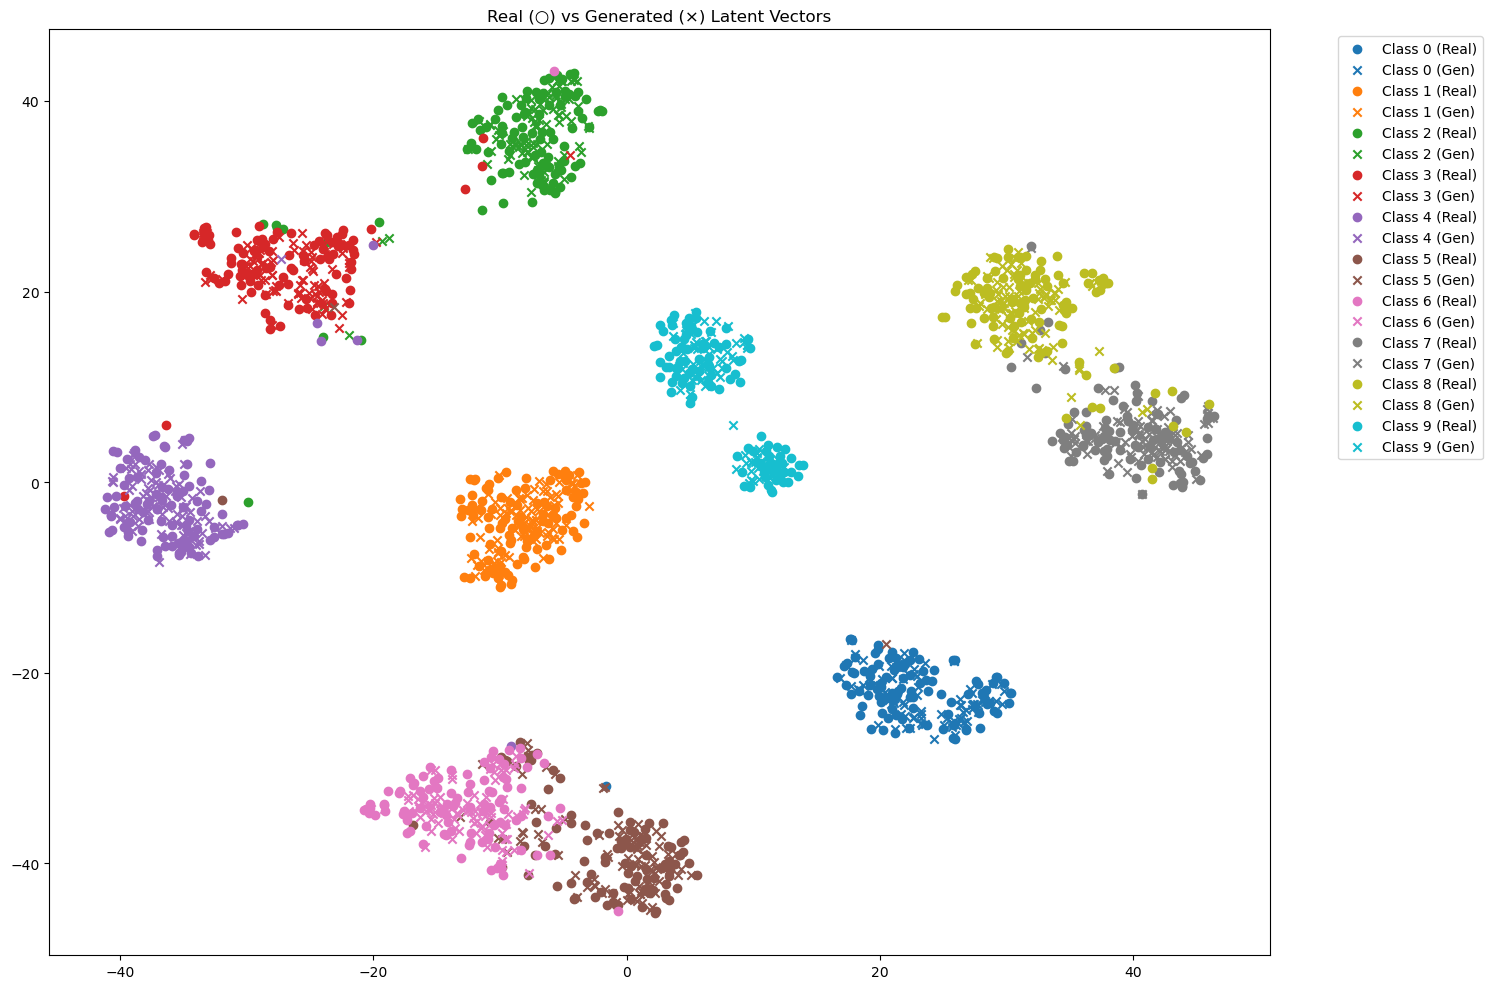

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Config
REAL_DATA_PATH = "/data/yyang409/bowen/imagenet_feature/swin_base/patch4_window7_224/image_features_w_label_train.npz"
# GENERATED_PATH = "/scratch/bowenxi/dit/data_gen/B_4/final_data/imagenet_latents_0.npz"  # Updated to .npz
#GENERATED_PATH = "/scratch/bowenxi/dit/neural_tangent_kernel/result.npz"  # Updated to .npz
GENERATED_PATH ="/scratch/bowenxi/dit/data_gen/L_8/final_data/imagenet_latents_6.npz"
SELECTED_CLASSES = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
OUTPUT_PATH = "tsne_comparison.png"

def load_and_visualize(output_path=OUTPUT_PATH):
    # Load data
    real_data = np.load(REAL_DATA_PATH)
    generated_data = np.load(GENERATED_PATH)
    
    # ========== NaN Checks ==========
    # Check generated data
    # gen_features = generated_data["samples"]  # Verify key; adjust if necessary
    # gen_labels = generated_data["labels"]

    gen_features = generated_data["features"]  # Verify key; adjust if necessary
    gen_labels = generated_data["labels"]
    
    print("\n=== NaN Check ===")
    print(f"Generated features NaN count: {np.isnan(gen_features).sum()}")
    print(f"Generated labels NaN count: {np.isnan(gen_labels).sum()}")
    
    if np.isnan(gen_features).any() or np.isnan(gen_labels).any():
        raise ValueError("NaN values detected in generated data! Aborting visualization.")
    
    # Check real data
    real_features = real_data["features"]
    real_labels = real_data["labels"]
    print(f"Real features NaN count: {np.isnan(real_features).sum()}")
    print(f"Real labels NaN count: {np.isnan(real_labels).sum()}")
    print("="*40 + "\n")
    # ========== End NaN Checks ==========

    # Filter real data for selected classes (100 samples per class)
    real_latents, real_labels_filtered = [], []
    for class_idx in SELECTED_CLASSES:
        mask = (real_data["labels"] == class_idx)
        real_latents.append(real_data["features"][mask][:100])
        real_labels_filtered.extend([class_idx] * 100)
    real_latents = np.concatenate(real_latents)
    real_labels_filtered = np.array(real_labels_filtered)

    # Filter generated data for selected classes (100 samples per class)
    gen_latents, gen_labels_filtered = [], []
    for class_idx in SELECTED_CLASSES:
        mask = (generated_data["labels"] == class_idx)
        gen_latents.append(generated_data["samples"][mask][:100])
        gen_labels_filtered.extend([class_idx] * 100)
    gen_latents = np.concatenate(gen_latents)
    gen_labels_filtered = np.array(gen_labels_filtered)

    # Combine data
    combined = np.concatenate([real_latents, gen_latents])
    labels = np.concatenate([real_labels_filtered, gen_labels_filtered])
    
    # t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    embeddings = tsne.fit_transform(combined)
    
    # Plotting
    plt.figure(figsize=(15, 10))
    colors = plt.cm.tab10(np.linspace(0, 1, len(SELECTED_CLASSES)))
    
    for idx, class_id in enumerate(SELECTED_CLASSES):
        # Real samples (circles)
        real_mask = (labels == class_id) & (np.arange(len(labels)) < len(real_labels_filtered))
        plt.scatter(embeddings[real_mask, 0], embeddings[real_mask, 1],
                    color=colors[idx], marker='o', label=f'Class {class_id} (Real)')
        
        # Generated samples (crosses)
        gen_mask = (labels == class_id) & (np.arange(len(labels)) >= len(real_labels_filtered))
        plt.scatter(embeddings[gen_mask, 0], embeddings[gen_mask, 1],
                    color=colors[idx], marker='x', label=f'Class {class_id} (Gen)')
    
    plt.title("Real (○) vs Generated (×) Latent Vectors")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save and show
    plt.savefig(output_path, bbox_inches='tight', dpi=300)
    print(f"Plot saved to {output_path}")
    plt.show()

if __name__ == "__main__":
    load_and_visualize()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Config
REAL_DATA_PATH = "/data/yyang409/bowen/imagenet_feature/swin_base/patch4_window7_224/image_features_w_label_train.npz"
GENERATED_PATH = "/scratch/bowenxi/dit/data_gen/B_4/imagenet_latents_merged.npz"  # Updated to .npz
SELECTED_CLASSES = list(range(10))  # Changed to classes 0-9
OUTPUT_PATH = "tsne_comparison.png"

def load_and_visualize(output_path=OUTPUT_PATH):
    # Load data
    real_data = np.load(REAL_DATA_PATH)
    generated_data = np.load(GENERATED_PATH)
    
    # ========== NaN Checks ==========
    # Check generated data
    gen_features = generated_data["samples"]  # Verify key; adjust if necessary
    gen_labels = generated_data["labels"]
    
    print("\n=== NaN Check ===")
    print(f"Generated features NaN count: {np.isnan(gen_features).sum()}")
    print(f"Generated labels NaN count: {np.isnan(gen_labels).sum()}")
    
    if np.isnan(gen_features).any() or np.isnan(gen_labels).any():
        raise ValueError("NaN values detected in generated data! Aborting visualization.")
    
    # Check real data
    real_features = real_data["features"]
    real_labels = real_data["labels"]
    print(f"Real features NaN count: {np.isnan(real_features).sum()}")
    print(f"Real labels NaN count: {np.isnan(real_labels).sum()}")
    print("="*40 + "\n")
    # ========== End NaN Checks ==========

    # Filter real data for selected classes (100 samples per class)
    real_latents, real_labels_filtered = [], []
    for class_idx in SELECTED_CLASSES:
        mask = (real_data["labels"] == class_idx)
        real_latents.append(real_data["features"][mask][:100])
        real_labels_filtered.extend([class_idx] * 100)
    real_latents = np.concatenate(real_latents)
    real_labels_filtered = np.array(real_labels_filtered)

    # Filter generated data for selected classes (100 samples per class)
    gen_latents, gen_labels_filtered = [], []
    for class_idx in SELECTED_CLASSES:
        mask = (generated_data["labels"] == class_idx)
        gen_latents.append(generated_data["samples"][mask][:100])
        gen_labels_filtered.extend([class_idx] * 100)
    gen_latents = np.concatenate(gen_latents)
    gen_labels_filtered = np.array(gen_labels_filtered)

    # Combine data
    combined = np.concatenate([real_latents, gen_latents])
    labels = np.concatenate([real_labels_filtered, gen_labels_filtered])
    
    # t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    embeddings = tsne.fit_transform(combined)
      
    # Plotting
    plt.figure(figsize=(18, 12))  # Larger figure for better visibility
    colors = plt.cm.tab10(np.linspace(0, 1, len(SELECTED_CLASSES)))
    
    # Create proxy artists for legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Real',
               markerfacecolor='gray', markersize=10),
        Line2D([0], [0], marker='x', color='w', label='Generated',
               markerfacecolor='gray', markersize=10)
    ]
    
    for idx, class_id in enumerate(SELECTED_CLASSES):
        # Real samples (circles)
        real_mask = (labels == class_id) & (np.arange(len(labels)) < len(real_labels_filtered))
        plt.scatter(embeddings[real_mask, 0], embeddings[real_mask, 1],
                    color=colors[idx], marker='o', alpha=0.7)
        
        # Generated samples (crosses)
        gen_mask = (labels == class_id) & (np.arange(len(labels)) >= len(real_labels_filtered))
        plt.scatter(embeddings[gen_mask, 0], embeddings[gen_mask, 1],
                    color=colors[idx], marker='x', alpha=0.7)

    # Add class labels as text at median positions
    for class_id in SELECTED_CLASSES:
        class_mask = (labels == class_id)
        median_x = np.median(embeddings[class_mask, 0])
        median_y = np.median(embeddings[class_mask, 1])
        plt.text(median_x, median_y, str(class_id), fontsize=9, weight='bold',
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    plt.title("Real (○) vs Generated (×) Latent Vectors - Classes 0-9")
    plt.legend(handles=legend_elements, bbox_to_anchor=(1, 1), loc='upper left')

    
    plt.tight_layout()
    
    # Save and show
    plt.savefig(output_path, bbox_inches='tight', dpi=300)
    print(f"Plot saved to {output_path}")
    plt.show()

if __name__ == "__main__":
    load_and_visualize()

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/bowenxi/dit/data_gen/B_4/imagenet_latents_merged.npz'